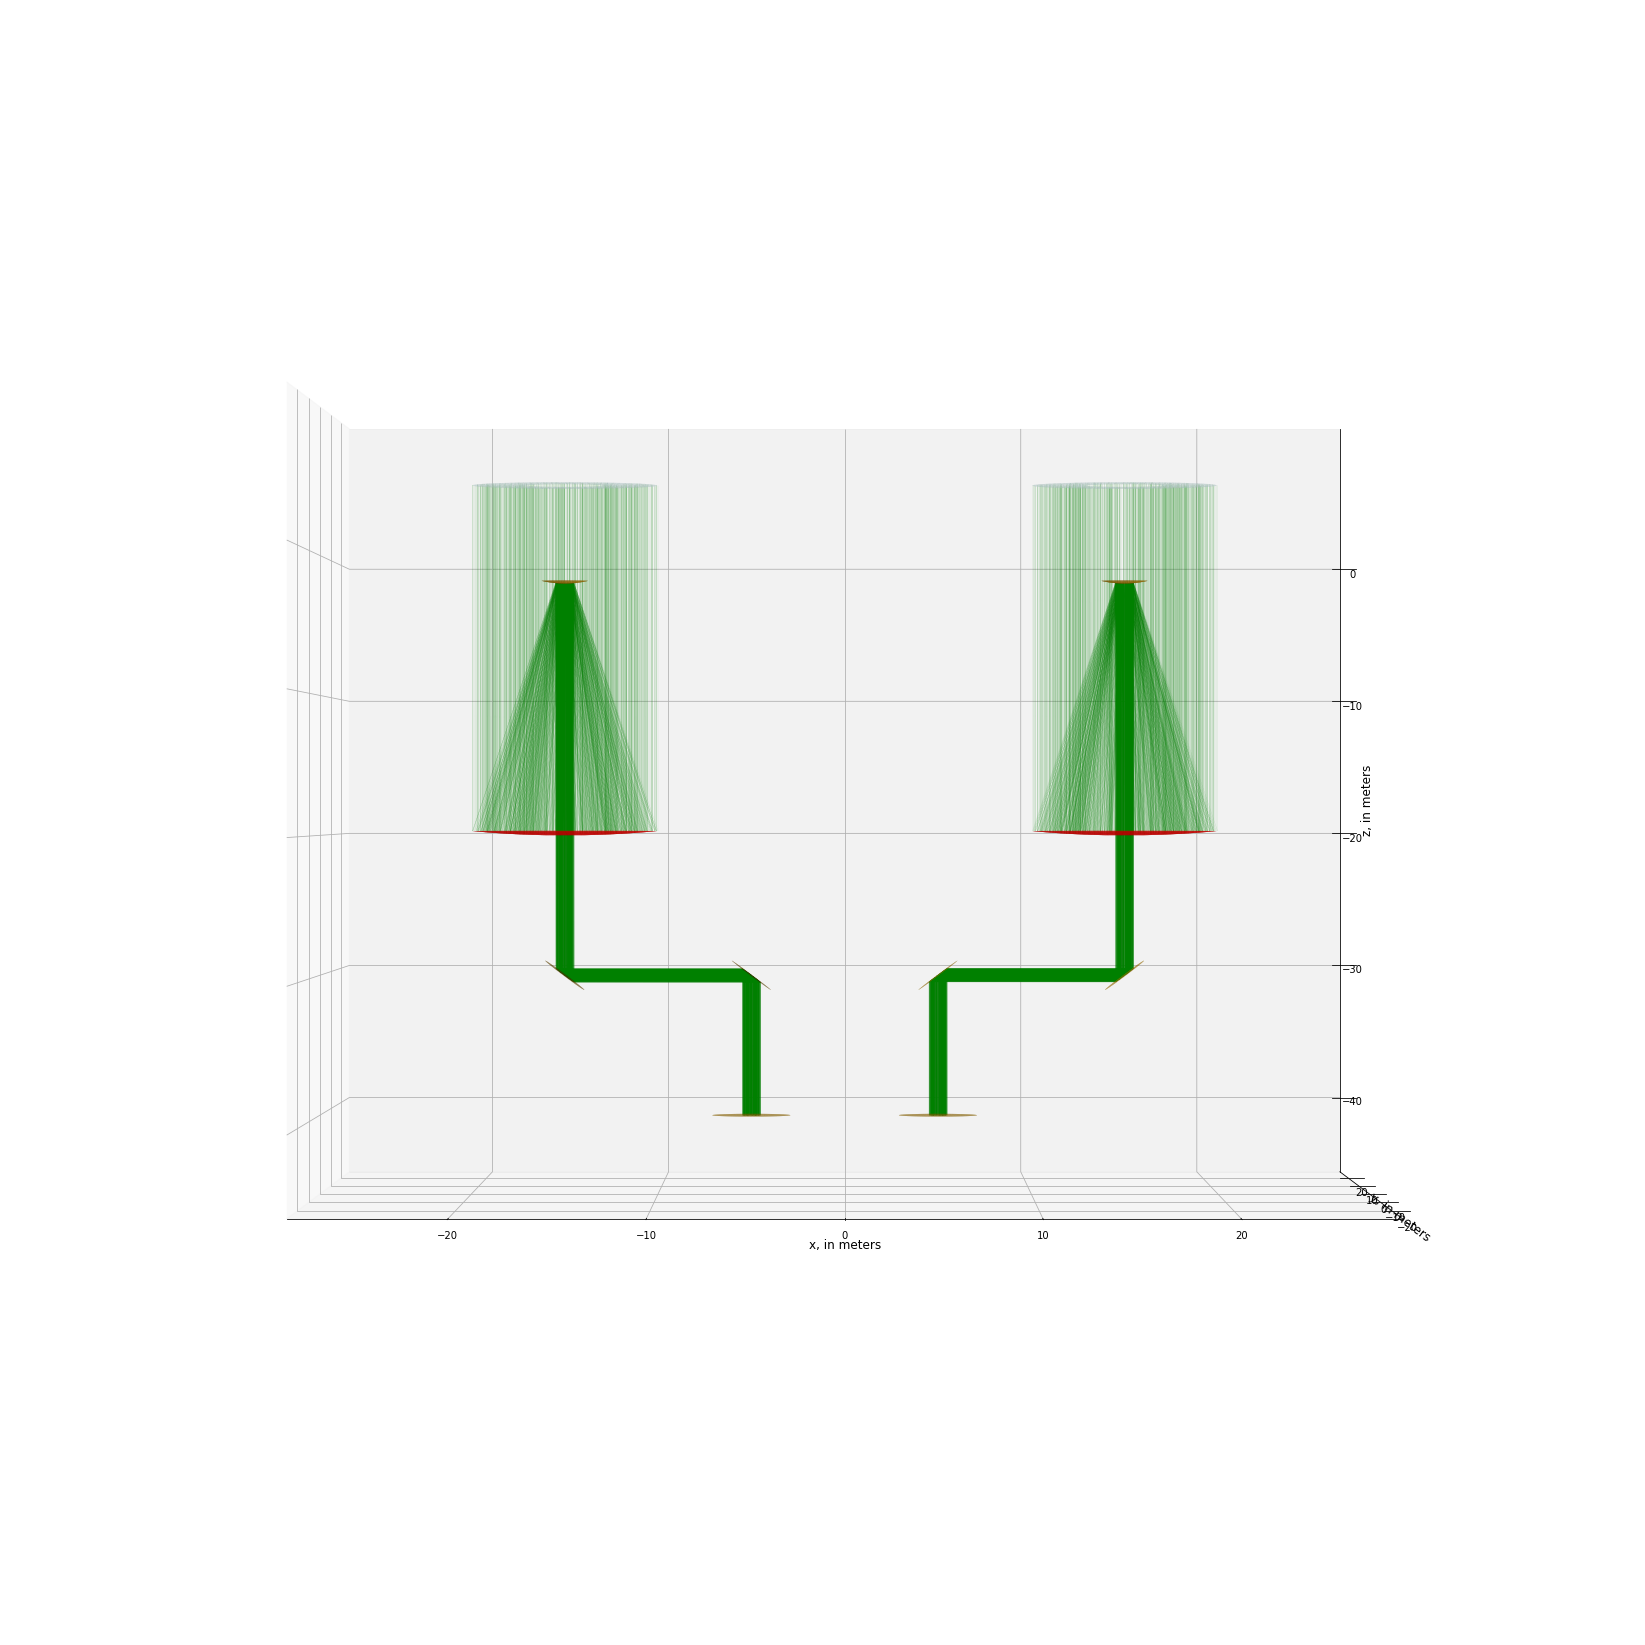

In [128]:
import pimms.optics as op
import copy
reload(op)
m0=op.SymmetricQuadricMirror(4., 10.,  f=np.inf, g=np.inf, b=(-1,-1),p=(0,0,5))
m1=op.SymmetricQuadricMirror(2., 10.,  f=20.,    g=np.inf, b=(1,1))
m2=op.SymmetricQuadricMirror(0.,  2.5, f=2.,     g=np.inf,    b=(1,1))
m3=op.SymmetricQuadricMirror(0.,  3.,  f=np.inf, g=np.inf, b=(1,1), p=(0,0,-30), q=op.quat.from_angles(0., np.pi/4.))
m4=op.SymmetricQuadricMirror(0.,  3.,  f=np.inf, g=np.inf, b=(1,1), p=(-10.,0,-30.), q=op.quat.from_angles(0., np.pi/4.))
d1=op.Detector(3.,  64, p=(-10,0,-40))
m0.is_virtual=True
m0.is_entrance=True
m1.is_primary=True
assembly=op.OpticalAssembly()
assembly.add_part(m0)
assembly.add_part(m1)
assembly.add_part(m2)
assembly.add_part(m3)
assembly.add_part(m4)
assembly.add_part(d1)
new_assembly=copy.deepcopy(assembly)
assembly.move([15,0,0])
new_assembly.rotate(op.quat.from_angles(np.pi, 0.))
new_assembly.move([-15,0,0])
assembly.join(new_assembly)
del new_assembly
s=op.LightSource((np.pi,np.deg2rad(5./3600.),np.inf))
p,q=s(assembly.get_entrance(), 1000, 1)
trace,seq=assembly.trace(q,steps=6)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
trigs,zs,extent=assembly.draw(axes=ax,draw_virtual=True,raytrace=trace,view_angles=(0, -90))

In [44]:
s=op.LightSource((np.pi,np.deg2rad(5./60.),np.inf))
p,q=s(assembly.get_entrance(), 1000000, 1e-3)

In [28]:
trace,seq=assembly.trace(q,steps=6)

coordinate transform: 0.082229 seconds
construct 2nd-order equation: 0.164327 seconds
branching and mapping: 0.268072 seconds
finalizating: 0.115404 seconds
coordinate transform: 0.092356 seconds
construct 2nd-order equation: 0.162712 seconds
branching and mapping: 0.374097 seconds
finalizating: 0.120462 seconds
coordinate transform: 0.085939 seconds
construct 2nd-order equation: 0.164675 seconds
branching and mapping: 0.465575 seconds
finalizating: 0.116944 seconds
coordinate transform: 0.086536 seconds
construct 2nd-order equation: 0.166005 seconds
branching and mapping: 0.242452 seconds
finalizating: 0.106838 seconds
coordinate transform: 0.088210 seconds
construct 2nd-order equation: 0.161160 seconds
branching and mapping: 0.242461 seconds
finalizating: 0.108609 seconds
coordinate transform: 0.084982 seconds
construct 2nd-order equation: 0.158706 seconds
branching and mapping: 0.245556 seconds
finalizating: 0.107329 seconds
coordinate transform: 0.084083 seconds
construct 2nd-order

In [21]:
r=np.random.rand(3,1000000)

In [29]:
timeit op.quat.rotate(m3.q,r)

13.7 ms ± 268 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [129]:
dets=assembly.get_detectors()

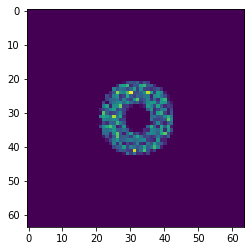

In [131]:
for i in range(1000):
    p,q=s(assembly.get_entrance(), 1000, 1.)
    trace,seq=assembly.trace(q,steps=6)
plt.imshow(dets[0].readout(clear_buffer=False)[0])

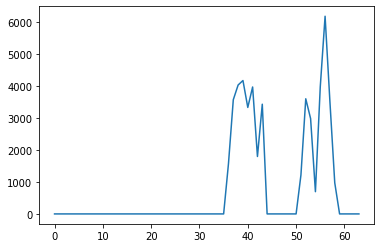

In [116]:
plt.plot(dets[0].readout(clear_buffer=False)[0][32,:])

In [110]:
dets[0].readout(clear_buffer=False)[0].sum()

516743.6786934509

In [102]:
dets[0].photon_buffer['weight']

array([241.52295, 241.52295, 241.52295, ..., 241.52295, 241.52295,
       241.52295], dtype=float32)